<a href="https://colab.research.google.com/github/felixgper/Walmart/blob/master/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE VENTAS - WALMART**

---

## Descripción

Este es un proyecto sobre las ventas de una cadena de mercados conocida como Walmart, esto lo hacemos con el objetivo de comparar ventas, así como, un proyecto para visualizar el ingreso de los proximos años. Asi mismo, revisar que modelo de aprendizaje le funciona mejor a nuestro proyecto.

En conjunto con esto, se buscara compartir el conocimiento adquirido, como mejorar la toma de desiciones futuras.

---

## Preguntas/Problema que buscamos resolver

El objetivo principal es conocer las distintas maneras que se tiene para hacer una buena clausterizacion, entre ello nos haremos las sguientes preguntas:

- ¿Como afecta la temperatura de region en las ventas?
- ¿El tener un dia festivo dentro de la semana, que tanto impacta en las ventas?
- ¿La tasa de desempleo que tanto afecta a las ventas?
- ¿El tener un combustible barato hace una mayor venta semanal?
- ¿Que modelo de aprendizaje se adecúa mejor para un proyectado de ventas?

Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo. También podría ser útil para personas que deseen calcular una venta proyectada. Como revisar que modelo es mejor, por ejemplo, se nos mencionó que debemos usar una regresión lineal para el cálculo y proyección de ventas, veremos a continuación si esto es verdad.

---



Autor: Felix Gonzales Servan

Contacto: felixgonzales94@gmail.com

# 1. IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving Walmart_sales.csv to Walmart_sales.csv


In [ ]:
print(uploaded.keys())

dict_keys(['Walmart_sales.csv'])


In [ ]:
df = pd.read_csv(next(iter(uploaded)), delimiter=',')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = [
    '#4C72B0',  # Azul
    '#55A868',  # Verde
    '#C44E52',  # Rojo
    '#8172B2',  # Morado
    '#CCB974',  # Amarillo
    '#64B5CD',  # Azul claro
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# 2. ANALISIS EXPLORATORIO DE DATOS

Los datos contienen las siguientes columnas:

* Store: Número de tienda
* Date: Fecha de inicio de la semana de ventas.
* Weekly_Sales: Ventas
* Holiday_Flag: Marca la presencia o ausencia de un día festivo
* Temperature: Temperatura del aire en la región.
* Fuel_Price: Costo del combustible en la región.
* CPI: Índice de precios al consumo
* Unemployment: Tasa de desempleo

# 2.1. Informacion general sobre el conjunto de datos

In [ ]:
# Tamaño del conjunto de datos
tamaño = df.shape
print('El tamaño de nuestro conjunto de datos es: ', tamaño)

print('-----------------------------------------------------------------------')
# Valores duplicados
duplicados = df.duplicated().unique()
print('Valores duplicados de nuestro conjunto de datos: ', duplicados)

print('-----------------------------------------------------------------------')
# Valores nulos
nulos = df.isnull().sum()
print('Los valores nulos son: \n',nulos)

print('-----------------------------------------------------------------------')
# Nombre de nuestras variables
columnas = df.columns
print('Nombre de nuestras variables: \n', list(columnas))

print('-----------------------------------------------------------------------')
# Tipos de datos de cada variable
tipo = df.dtypes
print('Los tipos de datos: \n', tipo)
print('-----------------------------------------------------------------------')

# Estadísticas descriptivas a nuestras columnas numericas
estadisticas = df.describe().round(2)
print('Estadísticas descriptivas:')
estadisticas

print('-----------------------------------------------------------------------')
# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

El tamaño de nuestro conjunto de datos es:  (6435, 8)
-----------------------------------------------------------------------
Valores duplicados de nuestro conjunto de datos:  [False]
-----------------------------------------------------------------------
Los valores nulos son: 
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
-----------------------------------------------------------------------
Nombre de nuestras variables: 
 ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
-----------------------------------------------------------------------
Los tipos de datos: 
 Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
--------------------------------------------------------

In [ ]:
# Convertir la columna 'Date' al formato adecuado ("%d-%m-%Y")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extraer componentes de fecha
df['month'] = df['Date'].dt.month      # Mes (entero del 1 al 12)
df['year'] = df['Date'].dt.year        # Año (entero)

# Obtener el número de semana del año
df['week'] = df['Date'].dt.isocalendar().week

# Eliminar la columna 'Date' si ya no la necesitas
df.drop(['Date'], axis=1, inplace=True)

# 2.2. Analisis de distribución

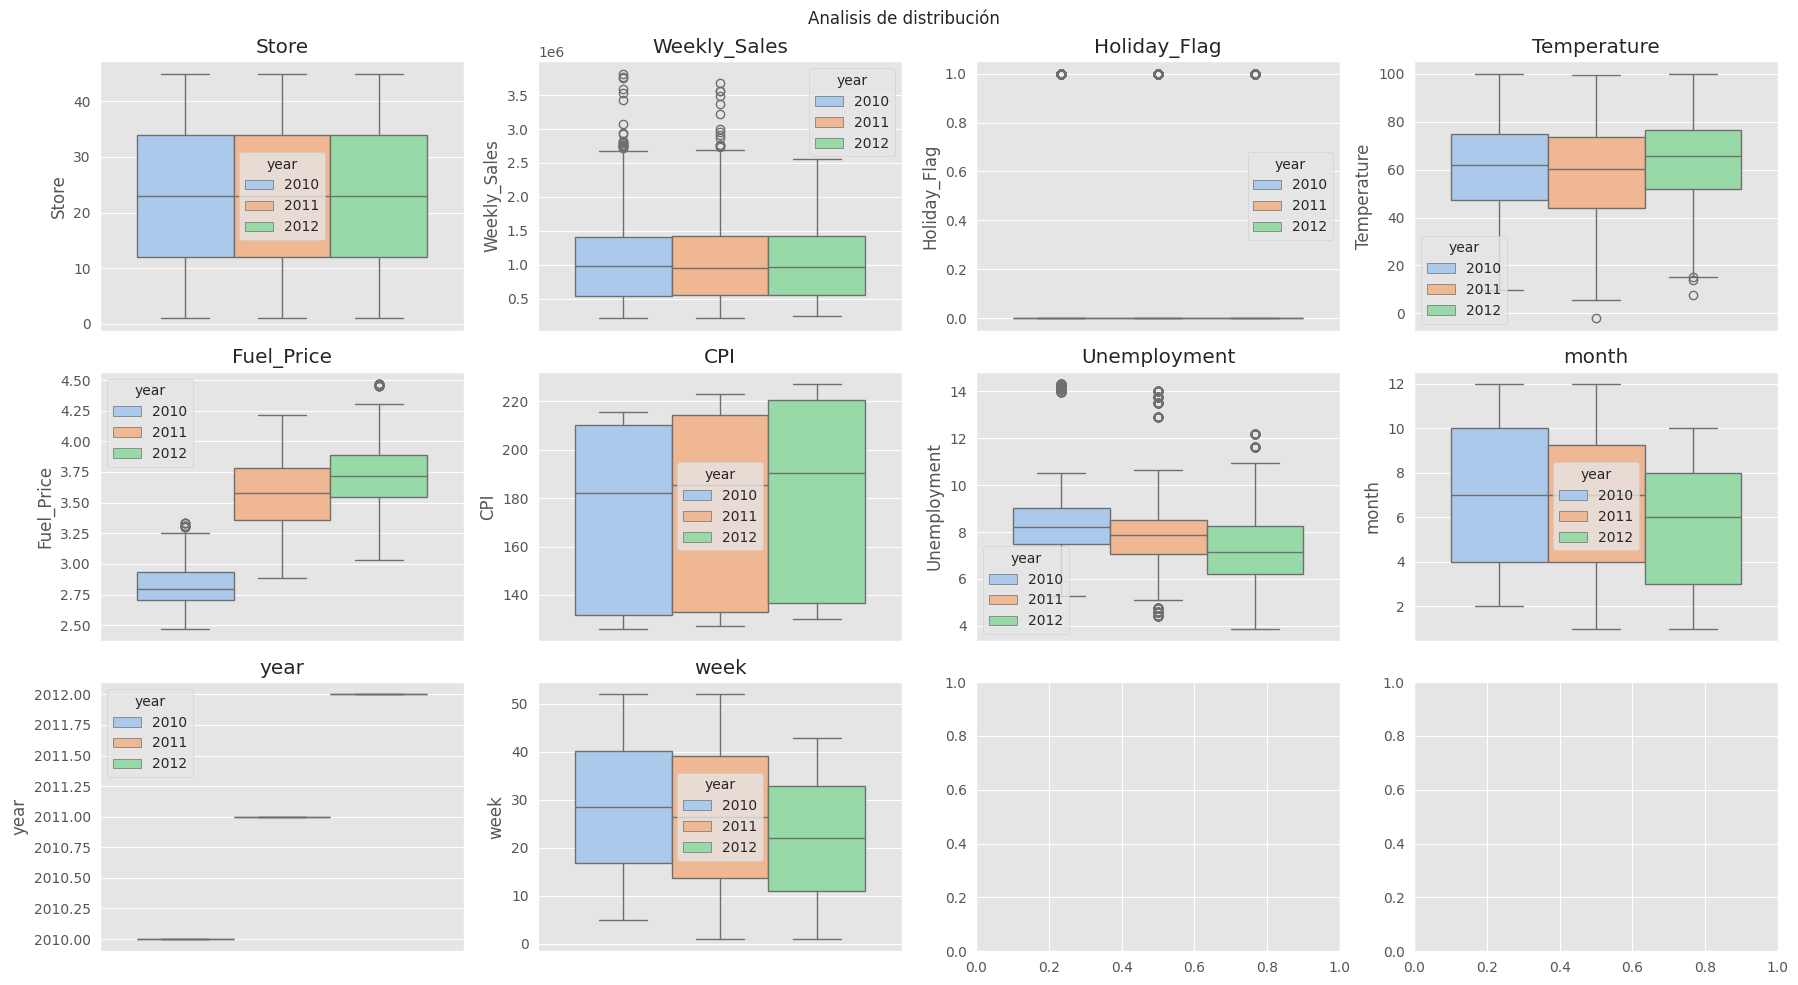

In [ ]:
# Usaremos el boxplot para la visualizacion de valores atípicos.
# Lo primero que haremos sera crear una variable y excluir aquellas columnas de tipo 'object'

int_columns = df.select_dtypes(exclude = 'object').columns

# Especificaremos nuestro numero de plots como filas para poder hacer nuestro grafico
nplots = len(int_columns)
nrows = 3

# Ahora calculamos nuestras columnas a utilizar, esto se hace mediante una division entera '//' y su residuo '%'
cols = (nplots//nrows) + (nplots%nrows)

#Creamos nuestro grafico correspondiente para cada uno de nuestras varibales nuemricas
fig, axs = plt.subplots(nrows = 3, ncols = cols, figsize = (18,10))
fig.suptitle('Analisis de distribución')

for i, col in enumerate(int_columns):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.boxplot(data = df, y= col, ax=ax, hue='year', palette='pastel')
    ax.set_title(col)

plt.tight_layout()
plt.show()

# 3.3. Distribución de variables categóricas

In [ ]:
# Para ello antes de realizarlo, convertiremos 'Holiday_flag' en variables categoricas, esto por convinencia del proyecto.
mappging = {0: 'No', 1:'Si'}

df['Holiday_Status'] = df['Holiday_Flag'].map(mappging)

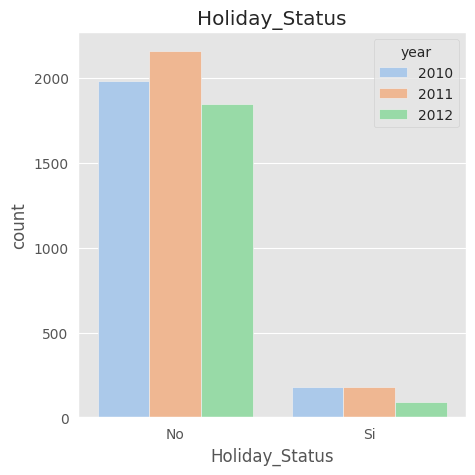

In [ ]:
df_categorias = ['Holiday_Status']

nplots = len(df_categorias)
nrows = 1

cols = nplots // nrows + (nplots % nrows)

fig, axs = plt.subplots(ncols= cols, nrows=nrows, figsize = (5,5))

# Asegurarse de que axs sea siempre una matriz bidimensional
if nplots == 1:
    axs = [axs]


for i, col in enumerate(df_categorias):
    ax = axs [ i // cols, i % cols] if nrows > 1 else axs[ i % cols]
    sns.countplot(data=df, x=col, ax = ax, hue='year', palette='pastel')
    ax.set_title(col)

# 3.4. Distribución de varibales numéricas

Media de Store en 2010: 23.0
Media de Store en 2011: 23.0
Media de Store en 2012: 23.0
Media de Weekly_Sales en 2010: 1059669.5
Media de Weekly_Sales en 2011: 1046239.32
Media de Weekly_Sales en 2012: 1033660.39
Media de Holiday_Flag en 2010: 0.08
Media de Holiday_Flag en 2011: 0.08
Media de Holiday_Flag en 2012: 0.05
Media de Temperature en 2010: 60.27
Media de Temperature en 2011: 58.8
Media de Temperature en 2012: 63.36
Media de Fuel_Price en 2010: 2.82
Media de Fuel_Price en 2011: 3.56
Media de Fuel_Price en 2012: 3.71
Media de CPI en 2010: 168.1
Media de CPI en 2011: 171.55
Media de CPI en 2012: 175.5
Media de Unemployment en 2010: 8.49
Media de Unemployment en 2011: 8.08
Media de Unemployment en 2012: 7.35
Media de month en 2010: 7.1
Media de month en 2011: 6.62
Media de month en 2012: 5.51
Media de year en 2010: 2010.0
Media de year en 2011: 2011.0
Media de year en 2012: 2012.0
Media de week en 2010: 28.5
Media de week en 2011: 26.5
Media de week en 2012: 22.0


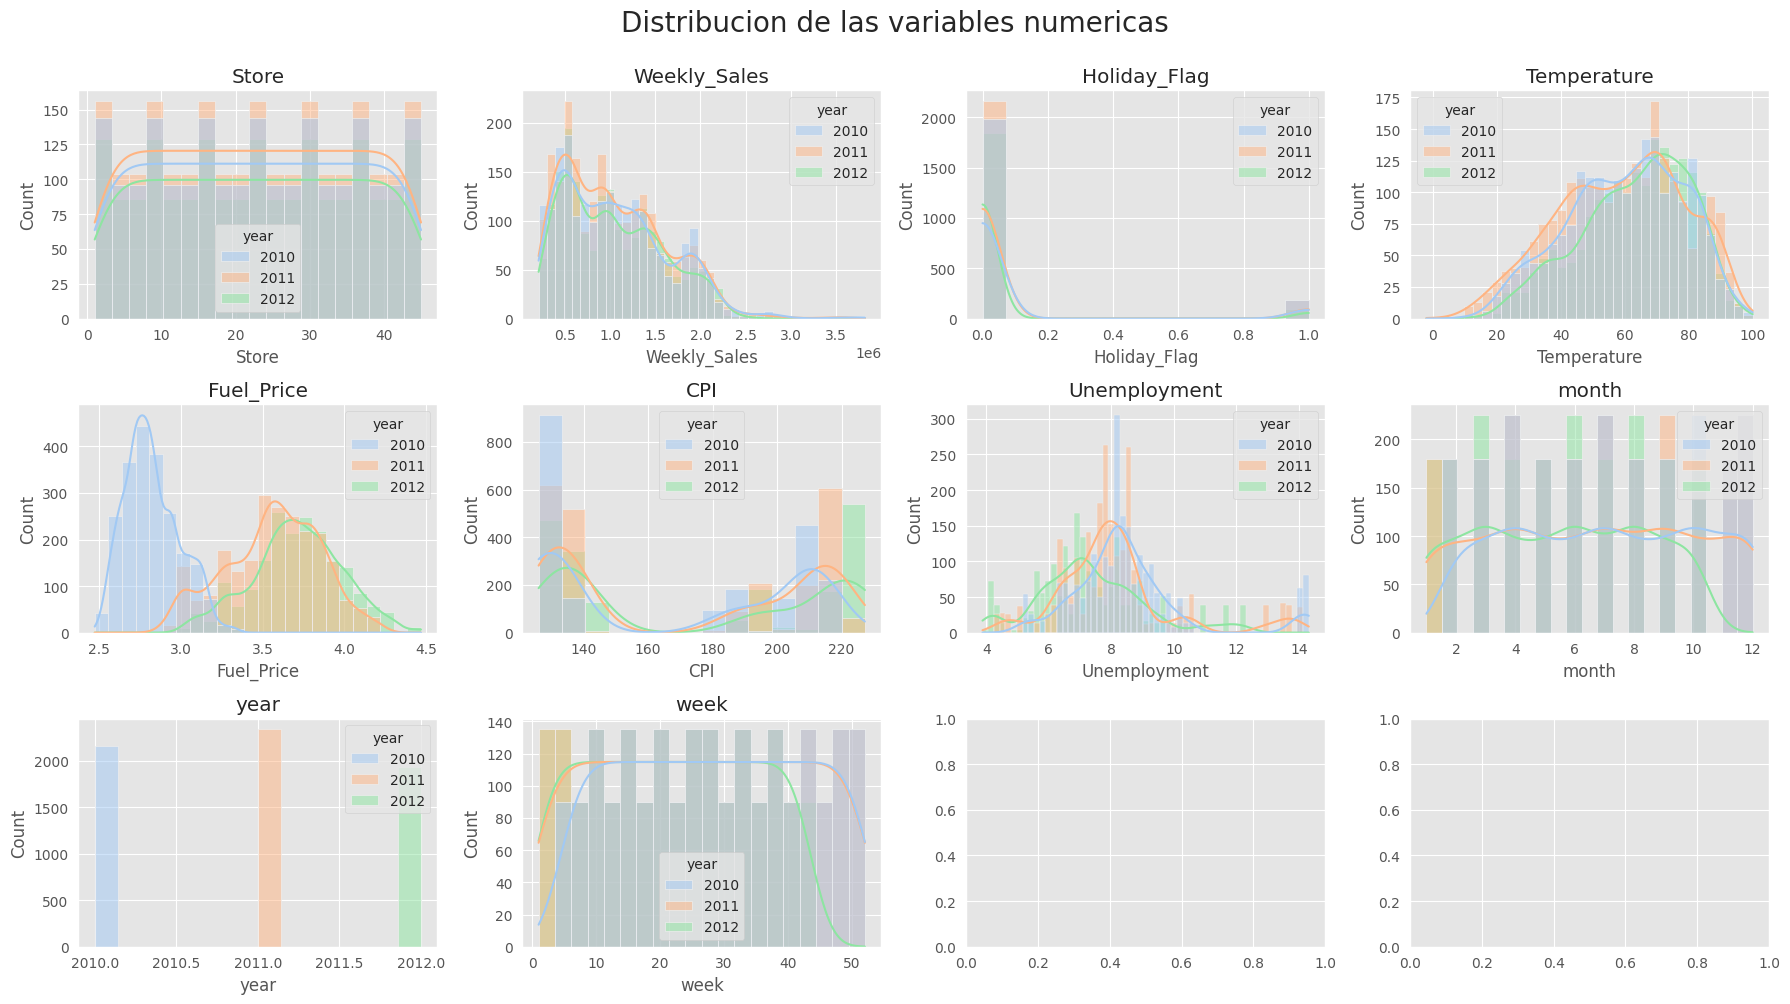

In [ ]:
var_num = df.select_dtypes(exclude='object').columns

nplots = len(var_num)
nrows = 3

cols = nplots // nrows + (nplots % nrows)

fig,axs = plt.subplots(nrows=nrows, ncols=cols, figsize= (18,10))
fig.suptitle('Distribucion de las variables numericas', fontsize = 20, y = 1.0)

for i, col in enumerate(var_num):
    ax = axs[ i// cols, i% cols] if nrows > 1 else axs [ i % cols]
    sns.histplot(data=df, x=col, ax=ax, kde= True, hue='year', palette='pastel')
    ax.set_title(col)
    for year in df['year'].unique():
        mean_value = df[df['year'] == year][col].mean()
        print(f'Media de {col} en {year}: {mean_value.__round__(2)}')

plt.tight_layout()
plt.show()

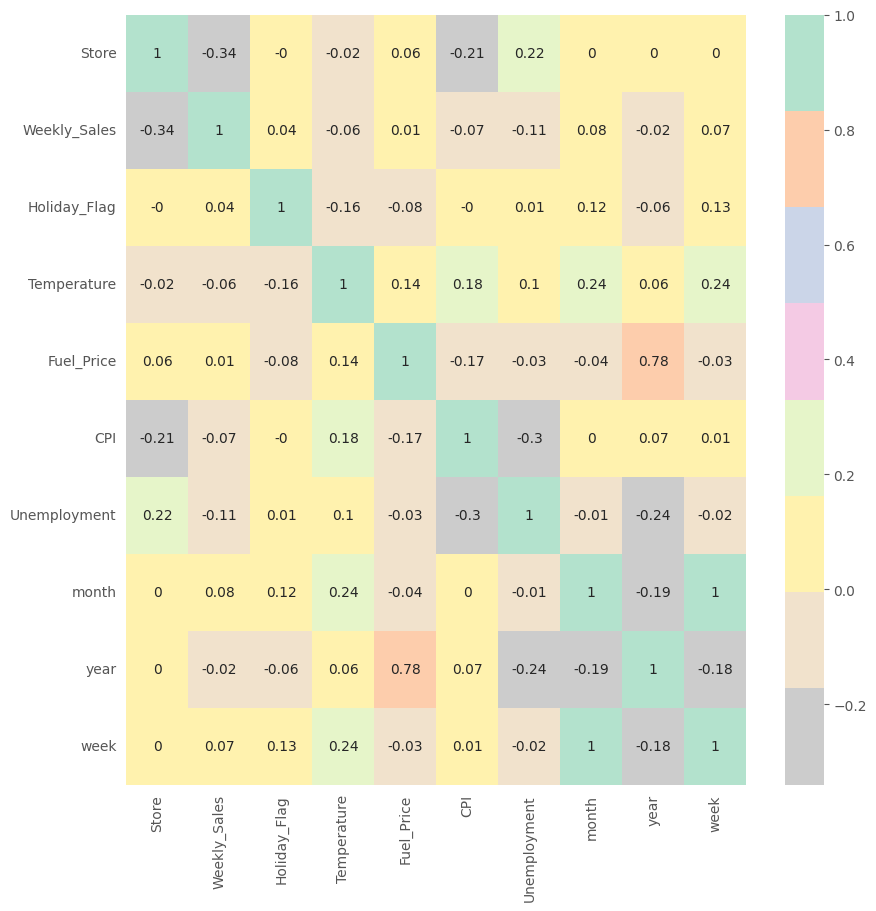

In [ ]:
# Hallamos la correlacion de nuestras variables numericas mediante un mapa de calor.
plt.figure(figsize= (10,10))
sns.heatmap(data = df[var_num].corr().round(2), annot=True, annot_kws={'size': 10}, cmap='Pastel2_r')
plt.show()

# 3.5. Relacion entre las varibales numericas y 'Holiday Flag'

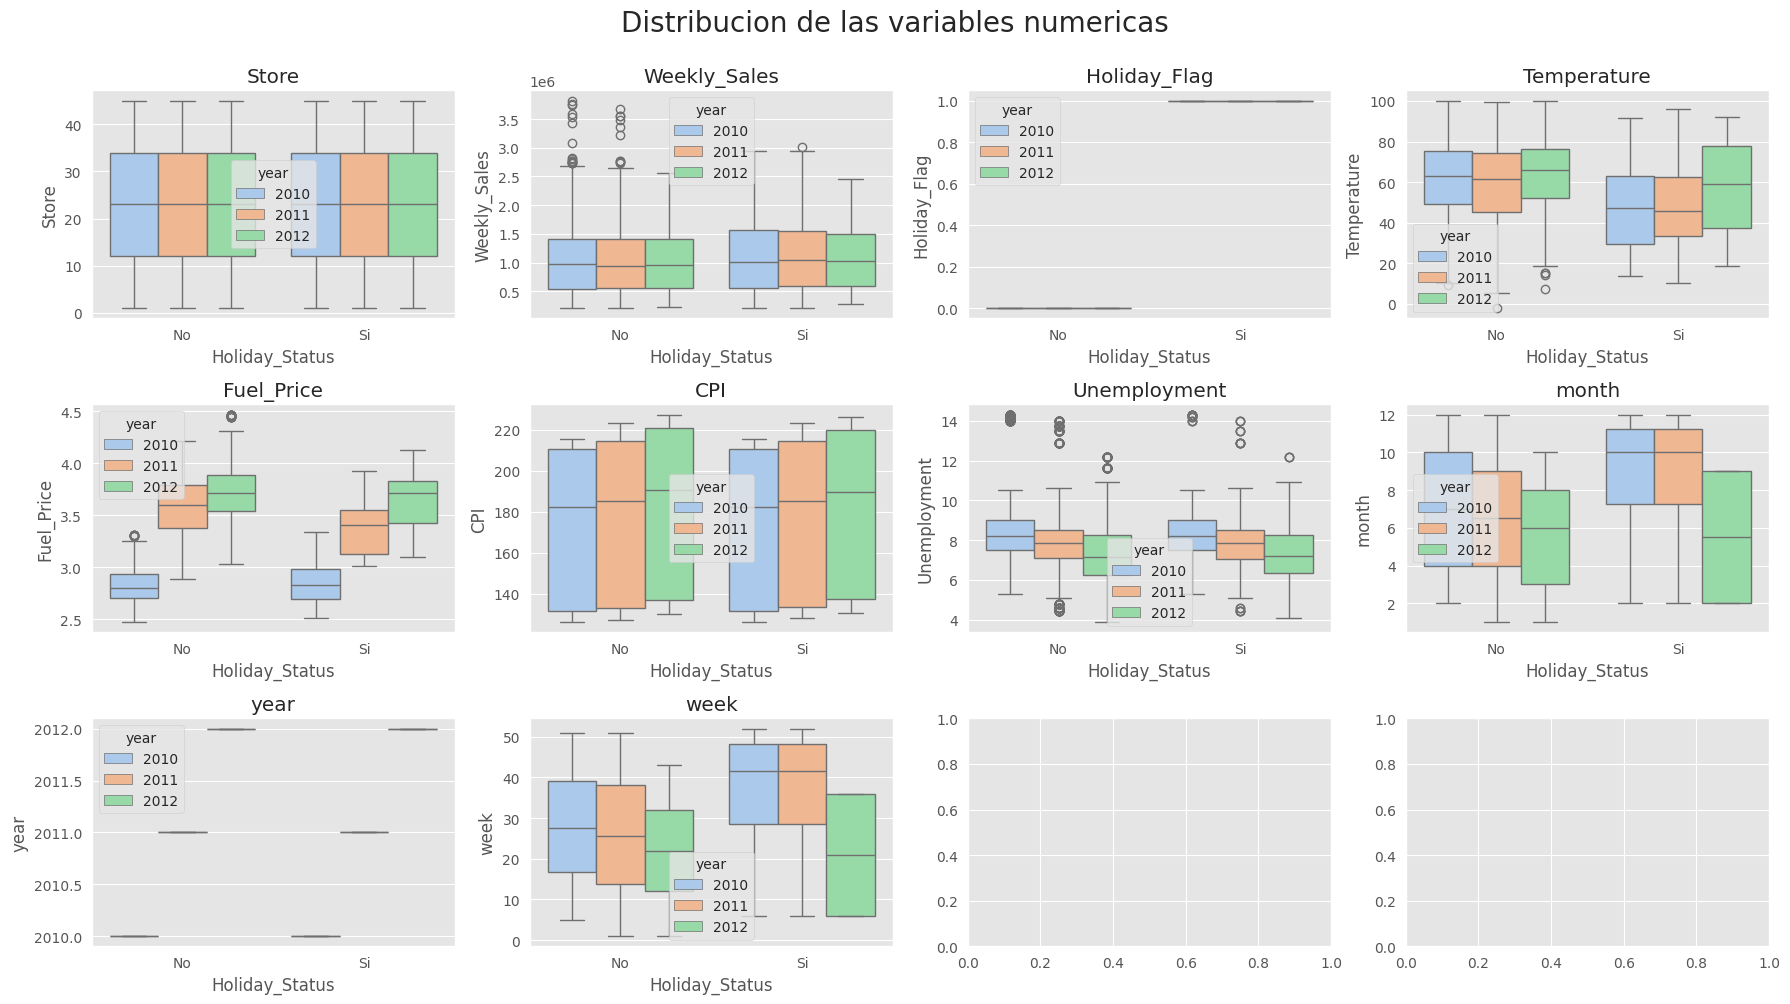

In [ ]:
# Esto lo hacemos para responder una pregunta de nuestro proyecto y encontrar nuevas incognitas a responder
var_num = df.select_dtypes(exclude='object').columns

nplots = len(var_num)
nrows = 3

cols = nplots // nrows + (nplots % nrows)

fig,axs = plt.subplots(nrows=nrows, ncols=cols, figsize= (18,10))
fig.suptitle('Distribucion de las variables numericas', fontsize = 20, y = 1.0)

for i, col in enumerate(var_num):
    ax = axs[ i// cols, i% cols] if nrows > 1 else axs [ i % cols]
    sns.boxplot(y=col, x='Holiday_Status', data= df, ax=ax, hue='year', palette='pastel')
    ax.set_title(col)

plt.tight_layout()
plt.show()

# 3.6. Analisis específico para responder nuestras preguntas

Luego de realizar una analisis detallado podemos afirmar ciertas cosas, de los cuales lo mas resaltante que en cada analisis tiene que estar separado por los años que estos tienen; ya que, al principio se estuvo haciendo por días festivos, esto para ver las distribucion de estos datos como el comportamiento de ventas en estos días, pero estos datos estaban inflados.

Puesto que, estaban agarrando ventas de 3 años, lo ideal es separarlo y revisar cada año como se ha comportado la venta para hallar una prediccion adecuada.

Pregunta: ¿Que tiendas tienen mas ingresos y que porcentaje representa estas del total?

In [ ]:
cont_store = df.groupby(['Store', 'year'])['Weekly_Sales'].sum().sort_values(ascending=False).round(0).reset_index()
cont_store.set_index('Store', inplace= True)
cont_store['percentil'] = (cont_store['Weekly_Sales']/cont_store['Weekly_Sales'].sum())*100
cont_store['percentil']= cont_store['percentil'].round(2)

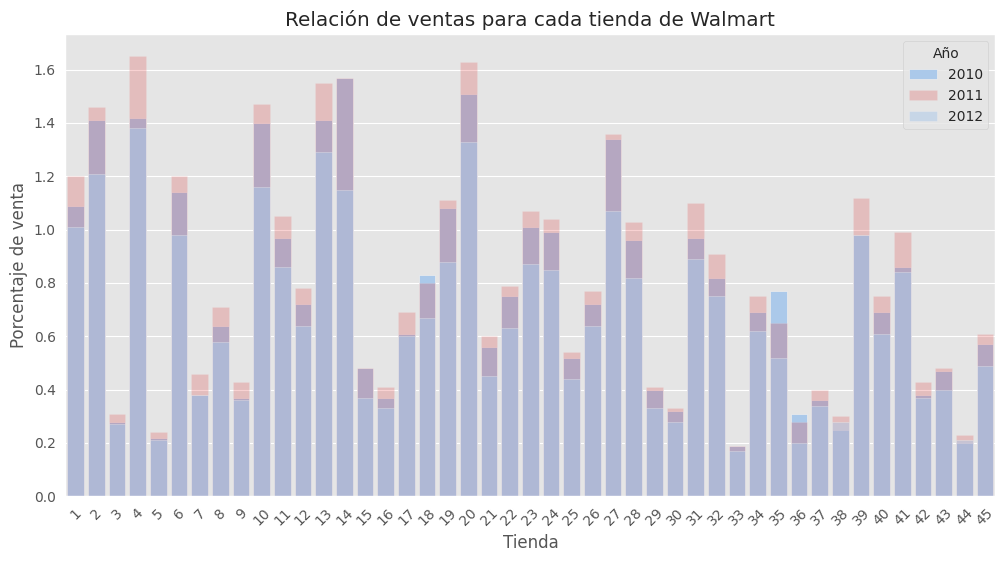

In [ ]:
# Filtrar el DataFrame para cada año
cont_store_2010 = cont_store[cont_store['year'] == 2010]
cont_store_2011 = cont_store[cont_store['year'] == 2011]
cont_store_2012 = cont_store[cont_store['year'] == 2012]

# Crear el gráfico de barras apiladas con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cont_store_2010, x='Store', y='percentil', hue='year', palette='pastel')
sns.barplot(data=cont_store_2011, x='Store', y='percentil', hue='year', palette='flag', alpha=0.2)
sns.barplot(data=cont_store_2012, x='Store', y='percentil', hue='year', palette='pastel', alpha=0.5)

# Personalizar el gráfico
plt.title('Relación de ventas para cada tienda de Walmart')
plt.xlabel('Tienda')
plt.ylabel('Porcentaje de venta')
plt.xticks(rotation=45)
plt.legend(title='Año')

# Mostrar el gráfico
plt.show()



Pregunta: ¿Como afecta la temperatura para las ventas semanales?

In [ ]:
cont_temp = df.groupby(['Temperature', 'year'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
cont_temp.set_index('Temperature', inplace= True)
cont_temp['Percentil'] = (cont_temp['Weekly_Sales']/cont_temp['Weekly_Sales'].sum())*100
cont_temp['Percentil'] = cont_temp['Percentil'].round(2)

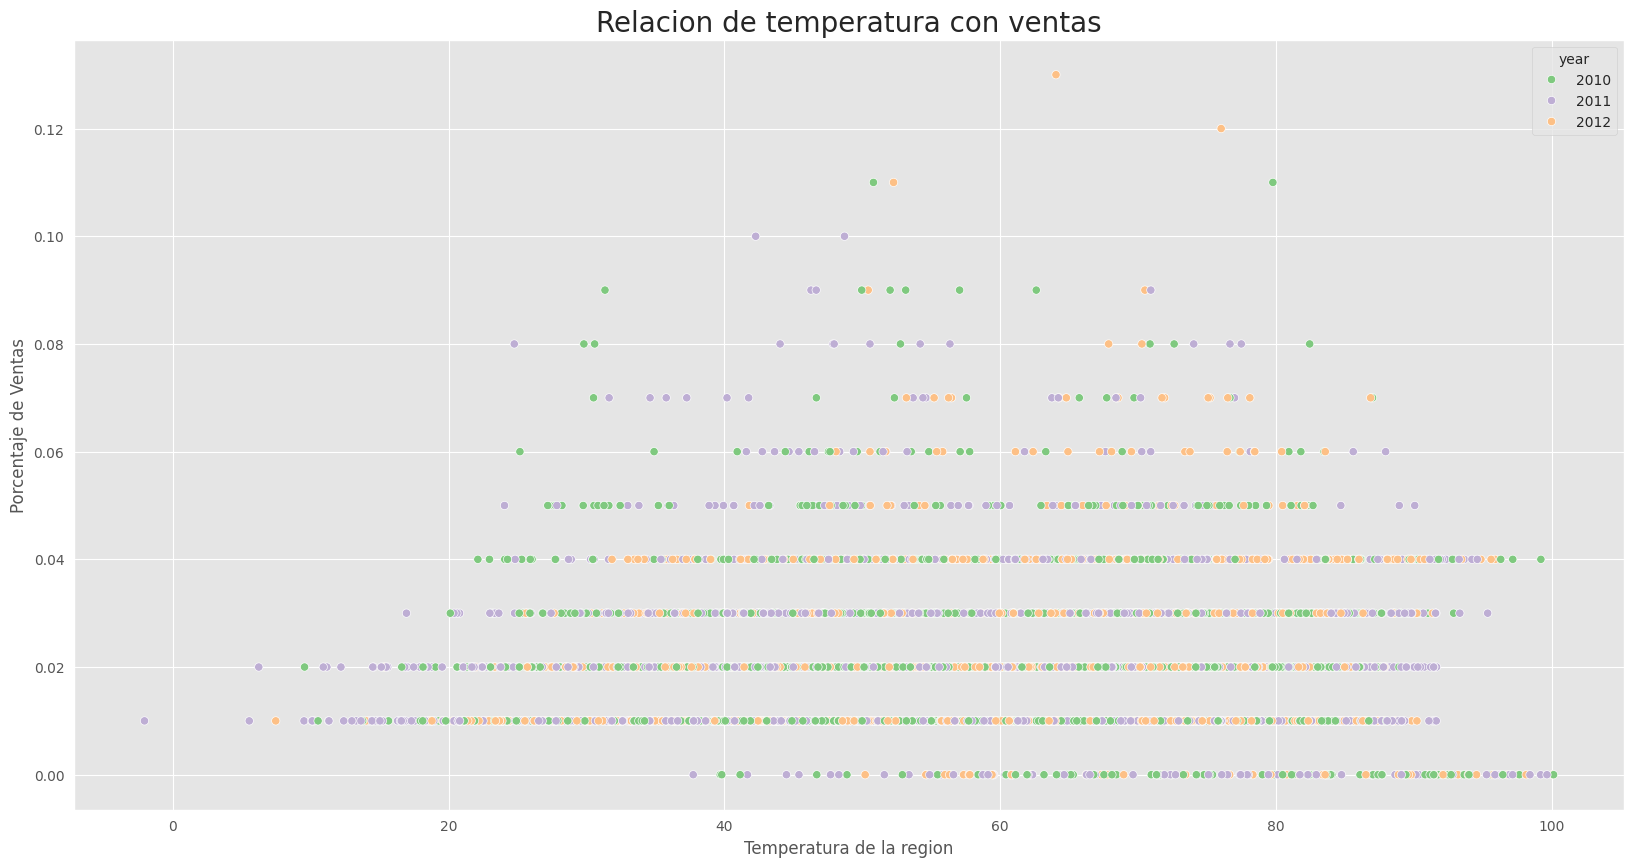

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = cont_temp, x = 'Temperature', y = 'Percentil', hue='year', palette= 'Accent')
plt.title('Relacion de temperatura con ventas', fontsize = 20, y = 1.0)
plt.xlabel('Temperatura de la region')
plt.ylabel('Porcentaje de Ventas')
plt.xticks( fontsize = 10)
plt.show()

Pregunta: ¿El tener un combustible barato hace una mayor venta semanal?


In [ ]:
cont_comb = df.groupby(['Fuel_Price', 'year'])['Weekly_Sales'].sum().reset_index()
cont_comb.set_index('Fuel_Price', inplace=True)
cont_comb['Percentil'] = (cont_comb['Weekly_Sales']/cont_comb['Weekly_Sales'].sum())*100
cont_comb['Percentil'] = cont_comb['Percentil'].round(2)

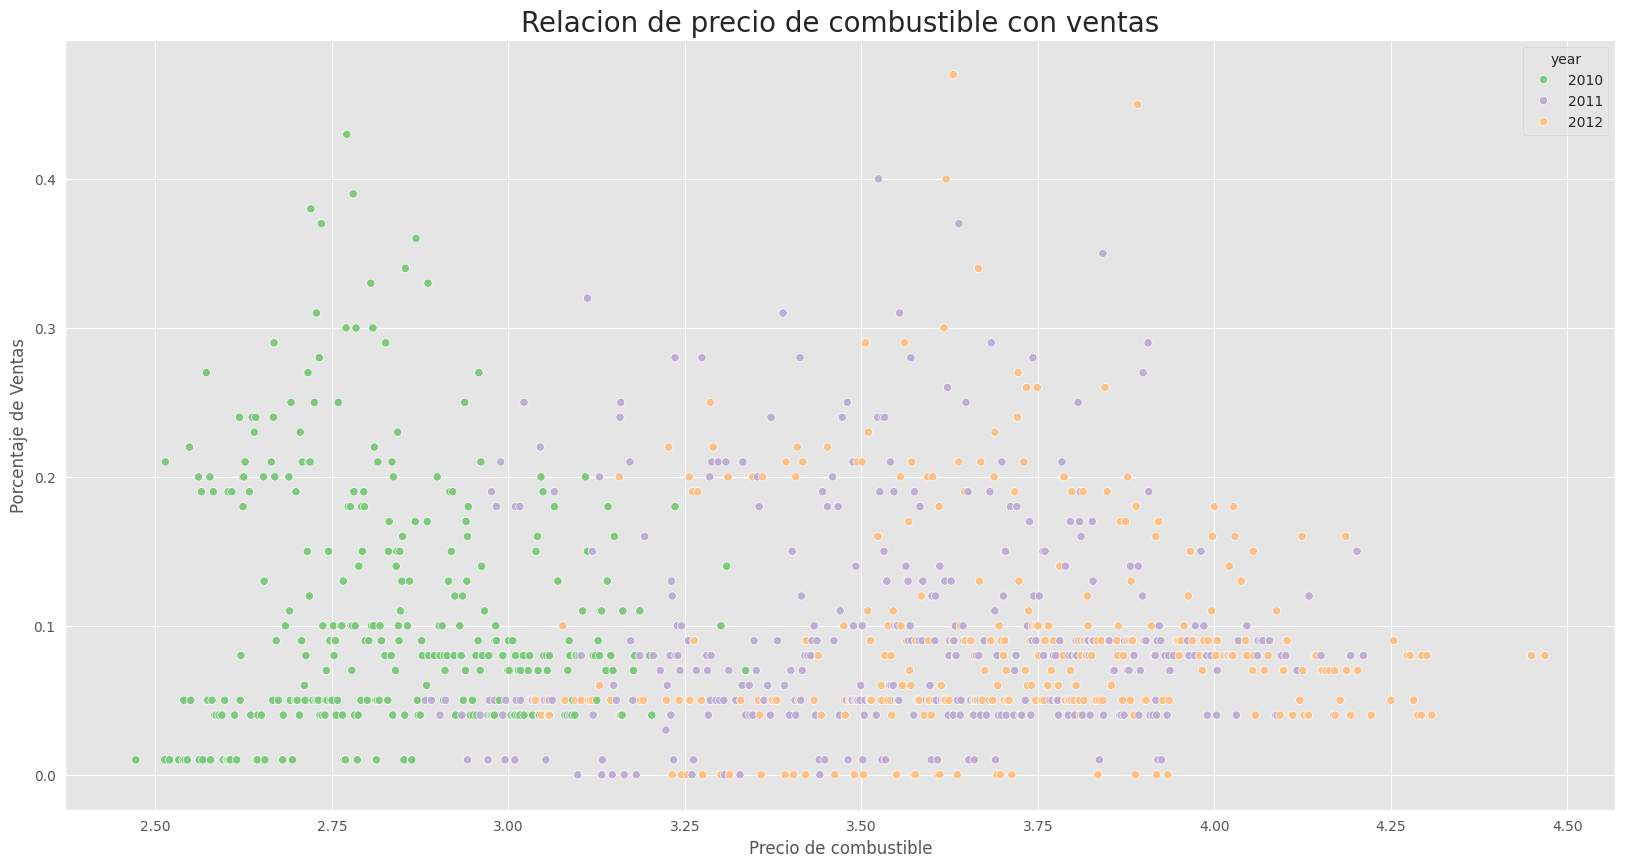

In [ ]:
plt.figure(figsize= (20,10))
sns.scatterplot(data = cont_comb, x = 'Fuel_Price', y = 'Percentil', hue='year', palette = 'Accent')
plt.title('Relacion de precio de combustible con ventas', fontsize = 20, y = 1.0)
plt.xlabel('Precio de combustible')
plt.ylabel('Porcentaje de Ventas')
plt.xticks( fontsize = 10)
plt.show()

Pregunta: ¿La tasa de desempleo que tanto afecta a las ventas por semana?

In [ ]:
cont_desemp = df.groupby(['Unemployment', 'year'])['Weekly_Sales'].sum().reset_index()
cont_desemp.set_index('Unemployment', inplace= True)
cont_desemp['Percentil'] = (cont_desemp['Weekly_Sales']/cont_desemp['Weekly_Sales'].sum())*100
cont_desemp['Percentil'] = cont_desemp['Percentil'].round(2)

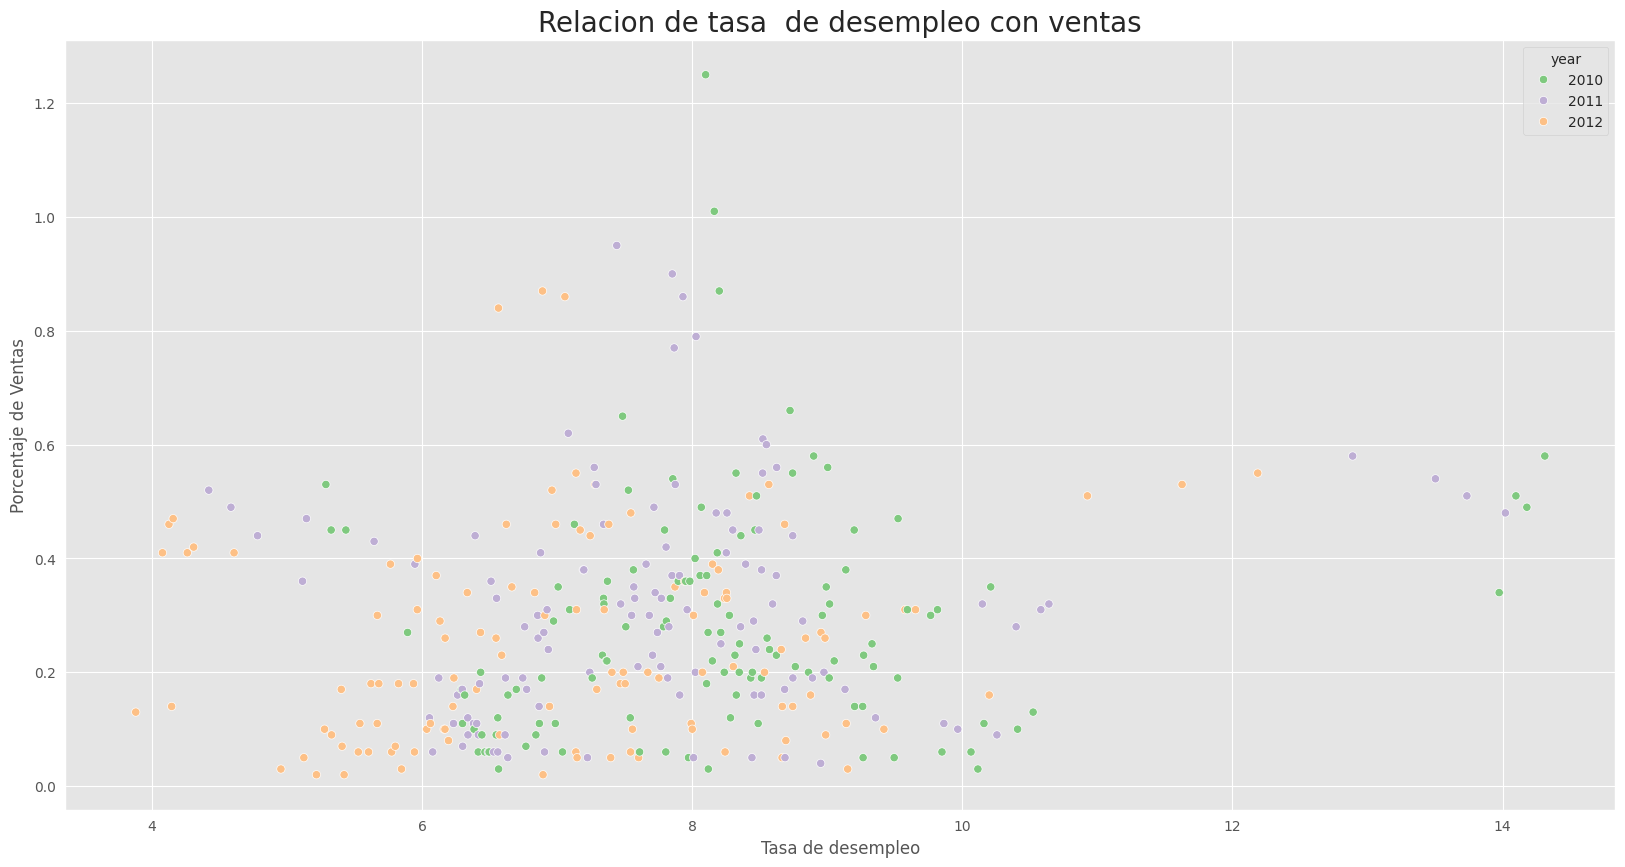

In [ ]:
plt.figure(figsize= (20,10))
sns.scatterplot(data = cont_desemp, x = 'Unemployment', y = 'Percentil', hue='year', palette = 'Accent')
plt.title('Relacion de tasa  de desempleo con ventas', fontsize = 20, y = 1.0)
plt.xlabel('Tasa de desempleo')
plt.ylabel('Porcentaje de Ventas')
plt.xticks( fontsize = 10)
plt.show()

Pregunta : ¿El tener un dia festivo dentro de la semana, que tanto impacta en las ventas?

In [ ]:
cont_festi = df.groupby(['Holiday_Status','week'])['Weekly_Sales'].sum().reset_index()
cont_festi['Percentil'] = (cont_festi['Weekly_Sales']/cont_festi['Weekly_Sales'].sum())*100
cont_festi['Percentil'] = cont_festi['Percentil'].round(2)

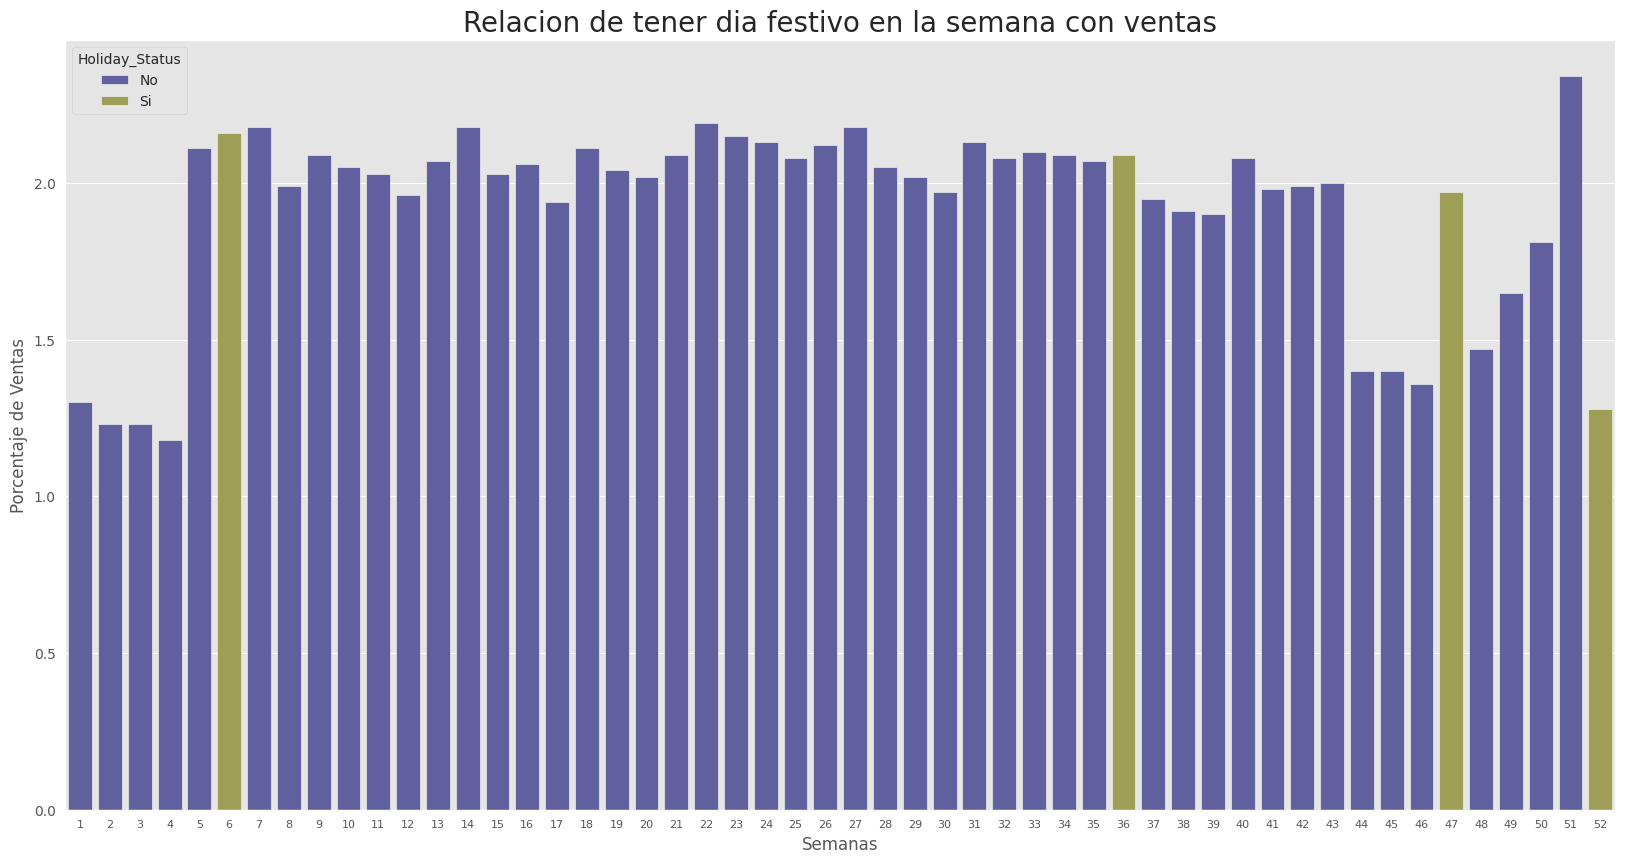

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = cont_festi, x= 'week', y = 'Percentil', hue= 'Holiday_Status', palette = 'gist_stern')
plt.title('Relacion de tener dia festivo en la semana con ventas', fontsize = 20, y = 1.0)
plt.xlabel('Semanas')
plt.ylabel('Porcentaje de Ventas')
plt.xticks( fontsize = 8)
plt.show()

Con estos graficos y tablas de contingencia hemos podido solventar nuestras dudas. En primer lugar, el tener un día festivo si aumenta las ventas por semana, siendo esto un margen mínimo en el aumento de ventas. Así mismo, se puede percatar que se hizo el cálculo de ventas por tienda, esto con el fin de saber cuales son las mejores pocicionadas en la región o en todo caso que tiendas necesitan una gestión distinta.

Con este gráfico se puede crear varias tomas de decisiones, ya sea por las ventas como por día festivo. Siguiendo con el análisis, tambien se nos preguntó si la temperatura infuye en la venta de Walmart, como respuesta tenemos un: sí, a muy baja temperatura hubo una menor venta, así como a una alta temperatura. Esto muy al contrario en una temperatura promedio (40 - 80 ), cabe recalcar que esta esta en unidad fahrenheit.

El alza y baja de combustible, no es un factor que influye de gran manera en las ventas de Walmart. Como último punto hablaremos de la tasa de desempleo y la relación que tiene esto con las ventas. Pues, si influye, por que a mayor tasa de desempleo, las personas no generan ingresos para poder invertir en los productos. Esto se puede evidenciar en el grafico mostrado lineas arriba.

# 3.7. Informe sobre el analisis de las ventas de Walmart

Podemos decir que los factores que influyen en las ventas de Walmart son la temperatura ya sea muy baja como muy alta, asi como días festivos y la tasa de desempleo. Para nosotros poder tomar accion, primero tenemos que ver la region de estos y su comportamiento en cada tienda, en este caso, hay algunas que no generan buenos ingresos, a base de ello se puede proyectar distintas tomas de acciones viendo el deficit que tienen.

Con esto queremos decir que para cada tienda habra una toma de accion diferente si así esto lo requiera. Nos ayudaremos de las gráficas como del conjunto de datos para poder resolver nuestras dudas y dar una mejor respuesta en cuanto a planes para la mejora de ventas en Walmart.

# 4.0. ENTRENAMIENTO Y TESTEO

---

# 4.1. División de datos

In [ ]:
# Entrenamiento y testeo
X = df.drop(['Holiday_Status', 'Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

# 4.2. Entrenamiento y evaluación de modelos

Los modelos que escogimos para nuestro proyecto fue :

- Regresión Lineal
- Árboles de Decisión
- Redes Neuronales
- Regresión Ridge

## 4.2.1. REGRESION LINEAL

In [ ]:
# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE) del modelo de regresión lineal:', mse.round(2))
print("Coeficiente de determinación (R²) del modelo de regresión lineal:", r2.round(2))


Error cuadrático medio (MSE) del modelo de regresión lineal: 272049348139.45
Coeficiente de determinación (R²) del modelo de regresión lineal: 0.16


## 4.2.2. ARBOLES DE DECISION

In [ ]:
# Modelo
dt = DecisionTreeRegressor(random_state = 42)

# Entrenamiento
dt.fit(X_train, y_train)

# Prediccion
y_pred = dt.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE) del modelo de árbol de decisión es:', mse.round(2))
print("Coeficiente de determinación (R²) del modelo de árbol de decisión es:", r2.round(2))

Error cuadrático medio (MSE) del modelo de árbol de decisión es: 20049754239.99
Coeficiente de determinación (R²) del modelo de árbol de decisión es: 0.94


# 4.2.3. REDES NEURONALES

In [ ]:
# Modelo
nn = MLPRegressor(max_iter = 500)

# Entrenamiento
nn.fit(X_train, y_train)

# Prediccion
y_pred = nn.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE) del modelo de árbol de decisión es:', mse.round(2))
print("Coeficiente de determinación (R²) del modelo de árbol de decisión es:", r2.round(2))

Error cuadrático medio (MSE) del modelo de árbol de decisión es: 315998550487.5
Coeficiente de determinación (R²) del modelo de árbol de decisión es: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4.2.4. REGRESION RIDGE

In [ ]:
# Modelo
rm = Ridge(alpha=1.0)

# Entrenamiendo
rm.fit(X_train, y_train)

# Predicciones
y_pred = rm.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE) del modelo de árbol de decisión es:', mse.round(2))
print("Coeficiente de determinación (R²) del modelo de árbol de decisión es:", r2.round(2))

Error cuadrático medio (MSE) del modelo de árbol de decisión es: 272049748000.39
Coeficiente de determinación (R²) del modelo de árbol de decisión es: 0.16


## 4.2.5. VALIDACION CRUZADA

In [ ]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Lineal', LinearRegression()),
    ('Arbol de Decision', DecisionTreeRegressor()),
    ('Red Neuronal', MLPRegressor(max_iter=10000)),
    ('Regresión Ridge', Ridge(alpha=1.0))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Lineal: 0.14316 (0.01272)
Arbol de Decision: 0.93569 (0.01485)
Red Neuronal: 0.18955 (0.03771)
Regresión Ridge: 0.14317 (0.01273)


En  todos los modelos nos guiamos del coeficiente de determinacion que el error cuadrático medio, esto porque para el error cuadratico medio se esta calculando de las ventas y estas son un numero muy grande, por lo no nos ayuda mucho. Por otro lado el coeficiente de determonación es un muy útil; ya que, es una medida estadística que indica la proporción de la varianza en la variable

# 5.0. VENTAS PROYECTADAS

In [ ]:
# Convertir las fechas del conjunto de datos histórico para graficar
df['Date'] = pd.to_datetime(df[['year', 'month', 'week']].astype(str).agg('-'.join, axis=1) + '-1', format='%Y-%m-%W-%w')

In [ ]:
# Preprocesamiento de datos
X = df.drop(['Holiday_Status', 'Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de árbol de decisión
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Crear un nuevo conjunto de datos para las proyecciones futuras
future_dates = pd.date_range(start='2013-01-01', end='2015-12-31', freq='W')

# Generar un nuevo DataFrame con las mismas características
X_new = pd.DataFrame({
    'Store': np.random.choice(df['Store'].unique(), size=len(future_dates)),
    'Holiday_Flag': np.random.choice([0, 1], size=len(future_dates)),
    'Temperature': np.random.normal(df['Temperature'].mean(), df['Temperature'].std(), size=len(future_dates)),
    'Fuel_Price': np.random.normal(df['Fuel_Price'].mean(), df['Fuel_Price'].std(), size=len(future_dates)),
    'CPI': np.random.normal(df['CPI'].mean(), df['CPI'].std(), size=len(future_dates)),
    'Unemployment': np.random.normal(df['Unemployment'].mean(), df['Unemployment'].std(), size=len(future_dates)),
    'month': future_dates.month,
    'year': future_dates.year,
    'week': future_dates.isocalendar().week
})

# Añadir las fechas al DataFrame
X_new['Date'] = future_dates


In [ ]:
# Realizar predicciones de ventas futuras
y_pred_new = dt.predict(X_new.drop(columns=['Date']))

# Añadir las predicciones al DataFrame
X_new['Predicted_Weekly_Sales'] = y_pred_new


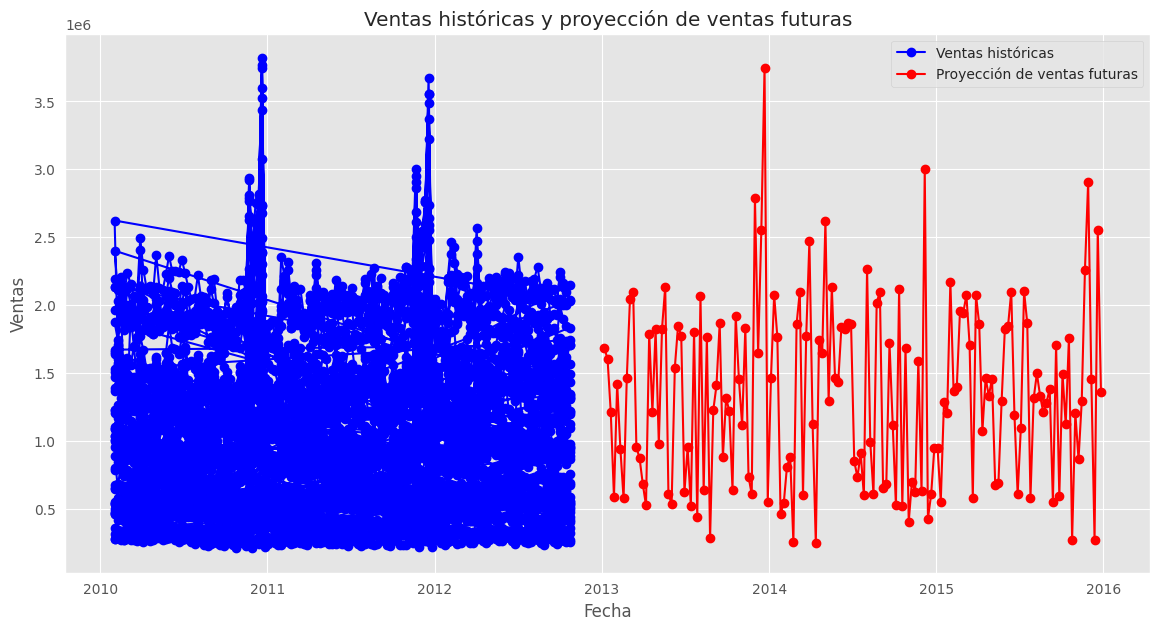

In [ ]:
# Graficar las ventas históricas
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Weekly_Sales'], marker='o', color='blue', label='Ventas históricas')

# Graficar las predicciones futuras
plt.plot(X_new['Date'], X_new['Predicted_Weekly_Sales'], marker='o', color='red', label='Proyección de ventas futuras')

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas históricas y proyección de ventas futuras')
plt.legend()
plt.show()


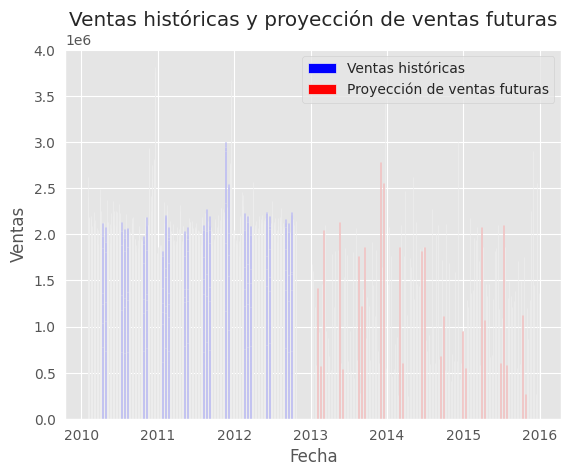

In [ ]:
# Graficar las ventas históricas
plt.bar(df['Date'], df['Weekly_Sales'], color='blue', label='Ventas históricas')

# Graficar las predicciones futuras
plt.bar(X_new['Date'], X_new['Predicted_Weekly_Sales'], color='red', label='Proyección de ventas futuras', alpha=1.0)

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas históricas y proyección de ventas futuras')
plt.legend()
plt.show()


# 6.0. CONCLUSION

Podemos decir que de los modelos que hemos realizado, el que tiene un mejor coeficiente de determinación es el de 'arbol de decision', por ende optamos con ello para poder realizar un grafico sobre mis ventas a futuro, teniendo en cuento las ventas historicas del año pasado.

El arbol de decisión nos ayuda mucho porque es el que mas se acerca a los valores reales, aunque al principio pensamos que se iba a resolver con el modelo de regresión lineal, no fue así, esto tbn se puede resolver mediante ello, pero no es la mejor opción.

Como ya lo dicho en su momento, este proyecto abarca de gran manera una toma decisiones específicas para determinada tiendas. Ya que, de las debilidades pueden forjarse grandes fortalezas.